<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana8/NewtonGeneralizado2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
G = (lambda x,y: x**2 - y**2 + 1, \
     lambda x,y: 2*x*y)

In [6]:
def GetVectorF(G,r):

    v = np.zeros(len(G))
    for i in range(v.shape[0]):
        v[i] = G[i](r[0],r[1])

    return v

In [7]:
GetVectorF(G,np.array([0.,0.]))

array([1., 0.])

In [8]:
def GetJacobian(G,r,h=1e-4):

    J = np.zeros((r.shape[0],r.shape[0]))

    for i in range(r.shape[0]):
        J[i,0] = (G[i](r[0]+h,r[1]) - G[i](r[0]-h,r[1]))/(2*h)
        J[i,1] = (G[i](r[0],r[1]+h) - G[i](r[0],r[1]-h))/(2*h)


    return J.T # alejandro cuenta luego porque!!

In [10]:
GetJacobian(G,np.array([1.,0.]))

array([[2., 0.],
       [0., 2.]])

In [11]:
def NewtonRaphson(G,r, tolerancia = 1e-10):

  it = 0
  d = 1.
  Distance = np.array([])

  while d  > tolerancia:

    F = GetVectorF(G,r)
    J = GetJacobian(G,r)
    InvJ = np.linalg.inv(J)

    r_new = r - np.dot(InvJ,F)

    diff = r_new - r
    #print(diff)
    d = np.linalg.norm(diff)
    #print(d)
    Distance = np.append(Distance,d)

    if it%50 == 0:
      print(it,d)

    r = r_new
    it += 1

  return r,Distance


In [ ]:
r0 = np.array([0.5,0.5])
r,Distance = NewtonRaphson(G,r0)
r

0 0.7905694150421819
50 1.2600764009368048
100 1.1046587890148478
150 11.016815846949932
200 1.005662699404093
250 2.1484547001906447
300 3.3357623352177868
350 0.7627016573518149
400 268.71424877684683
450 0.8019642249895563
500 1.6063872321400663
550 1.2391324574385558
600 0.5603856050003087
650 0.8591597277080013
700 0.6520572854761294
750 1.0901245422114032
800 1.4969998981843449
850 1.2680182289874893
900 0.11842963935604843
950 1.7193608563008311
1000 8.010361402699912
1050 1.9228728492362137
1100 1.0309579940260116
1150 0.9791366552673619
1200 1.3680191136155573
1250 2.0536102820814235
1300 1.9796758505559335
1350 0.803300850465396
1400 1.176365981036078
1450 1.2446631891391795
1500 0.9657483525832175
1550 3.7031218474634975
1600 1.0723937715524448
1650 1.0383361227560792
1700 8.050233083869493
1750 1.0695973165422932
1800 1.0993591650948766
1850 0.0985004671190889
1900 0.8023570382173062
1950 3.0053805688050597
2000 0.9797595786134592
2050 1.0241122490841332
2100 1.096964234571

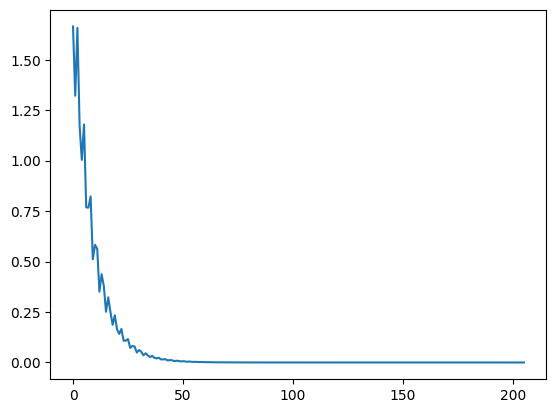

In [ ]:
plt.plot(Distance)